# MIT-BIH Arrhythmia Data Analysis

## Overview

- Set of over 4000 long-term Holter Recordings
- Obtained by the Beth Israel Hospital Arrhythmia Laboratory
- Obtained between 1975 and 1979
- **60% of the recordings were obtainer from inpatients**
- **23 records in total chosen from id 100-124 inclusive (Group A)**
- **25 records chosen from ids 200-234 inclusive (Group B)**
- **Total there are 48 records**
- **Each record is 30 minutes long**
- **2 signals recorded**
- Group B records were chosen to include complex ventricular,junctional and supraventricular arrhythmias and conduction abnormalities
- Subjects were 25 men aged 32 to 89 years, 22 women aged 23 to 89 years.
- Records 201 and 202 came from the same male subject

## ECG Lead Configuration
- In most records, the first signal seen is the modified limb lead II(MLII) obtained by placing the electrodes on the chest
- The lower signal is a modified lead V1
- QRS Complexes are seen in the MLII signal only
- Normal beats are difficult to discern in the lower signal

## Exceptions

- For record 114 the signals are reversed .i.e MLII is the second signal.
- Records 102 and 104 do not have MLII signal because of surgical dressing, modified lead V5 used for the upped signal.
- 4 records (102,104,107,217) include paced beats 


## Digitization process

The digitization process happend at **360Hz**
The ADCs were unipolar, with 11 bit resolution ranging from +5mv to -5mV
Sample values range from 0 to 2047 inclusive with a value of 1024 corresponding to 0

A number of frequency-domain artifacts have been identified and related to specific mechanical components of the recorders and the playback unit:


| Frequency(Hz)     | Source |
| ----------- | ----------- |
| 0.042      | Recorder pressure wheel       |
| 0.083   | Playback unit capstan     |
| 0.090 | Recorder capstan |
|0.167 | Playback unit capstan |
| 0.10-0.18 |Takeup reel |
| 0.20-0.36 | Supply reel  |


- **Bit Depth(n)**: 11
- **Levels(2<sup>n</sup>)**:2048
- **Voltage Range(r)**: 10mV
- **Step Size(delta)**: 4.88x10<sup>-3</sup>mV
- **Maximum Voltage**: 5mV
- **Minimum Voltage**: -5mV

Calculations:
```
Index = Round((Xalpha - Xmin)/delta) # Calculate the corresponding discrete value for a voltage

Xalpha = Xmin + (Index*delta) # Calculate the corresponding voltage for a discrete value.
```

## Exploration

In [1]:
from data_set_utils.data_reader import DataReader

In [2]:
%matplotlib inline

In [3]:
path = "raw_data\mit-bih-arrhythmia-database-1.0.0"
dr = DataReader(path, 11, 5, -5)
columns = ["N", "/", "R", "L", "V", "gender", "age", "leads"]
symbols_of_interest = ["N", "/", "R", "L", "V"]

### Example Record

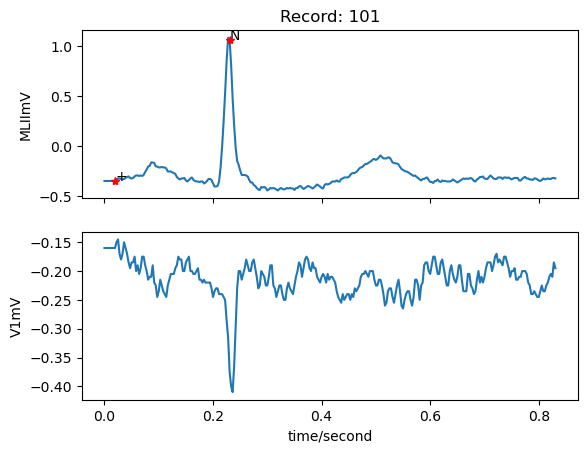

In [4]:
dr.plot_record("101", 300)

In [5]:
from utils.common_utils import load_patient_ids

In [6]:
patient_ids = load_patient_ids(path)

In [7]:
patient_ids.remove("102-0")

In [8]:
patient_ids

['100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '121',
 '122',
 '123',
 '124',
 '200',
 '201',
 '202',
 '203',
 '205',
 '207',
 '208',
 '209',
 '210',
 '212',
 '213',
 '214',
 '215',
 '217',
 '219',
 '220',
 '221',
 '222',
 '223',
 '228',
 '230',
 '231',
 '232',
 '233',
 '234']

In [9]:
len(patient_ids)

48

### Loading all patient records

In [10]:
records = dr.load_records(record_ids=patient_ids)

#### Counting annotations in all records

In [11]:
from data_set_utils.data_reader import count_annotations

In [12]:
count_tuple = count_annotations(records)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.DataFrame(data={"Count": count_tuple[1]}, index=count_tuple[0])
df.head()

,Count
!,472
"""",437
+,1291
/,7028
A,2546


<Axes: >

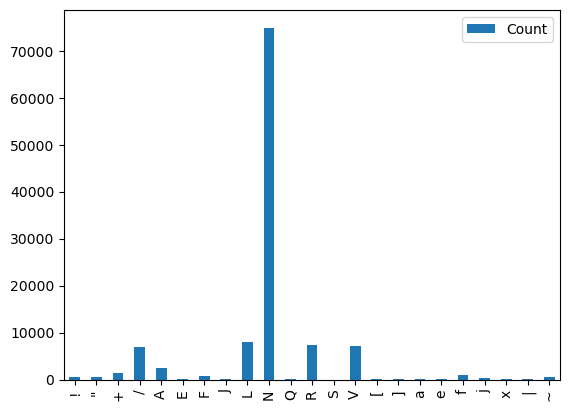

In [16]:
df.plot(kind="bar")

In [20]:
patient_data = dict()
patient_data["id"] = patient_ids

In [21]:
for i in count_tuple[0]:
    patient_data[i] = [0] * len(patient_ids)

In [22]:
patient_data_frame = pd.DataFrame(data=patient_data)

In [23]:
patient_data_frame.set_index("id", inplace=True)

In [24]:
ages = []
gender = []
leads = []
for record_id in patient_data["id"]:
    ecg_record = dr.load_record(record_id)
    ages.append(ecg_record.patient_age())
    gender.append(ecg_record.patient_gender())
    leads.append(ecg_record.leads())
    record_annotation_count_tuple = count_annotations([ecg_record])
    for symbol, count in zip(
        record_annotation_count_tuple[0], record_annotation_count_tuple[1]
    ):
        patient_data_frame.loc[record_id][symbol] = count

In [25]:
patient_data_frame["age"] = np.array(ages)

In [26]:
patient_data_frame["gender"] = np.array(gender)

In [27]:
lead_matrix = np.array(leads)
patient_data_frame["First lead"] = lead_matrix[:, 0]
patient_data_frame["Second Lead"] = lead_matrix[:, 1]

c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


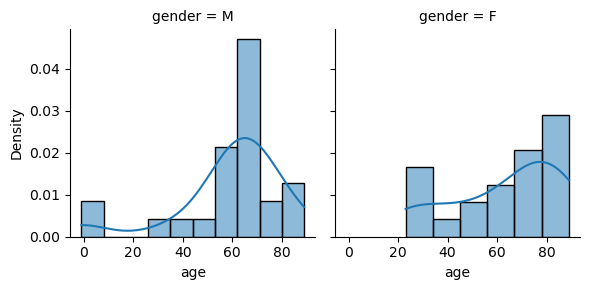

In [41]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.histplot, "age",kde=True,stat="density")

<Axes: xlabel='gender', ylabel='count'>

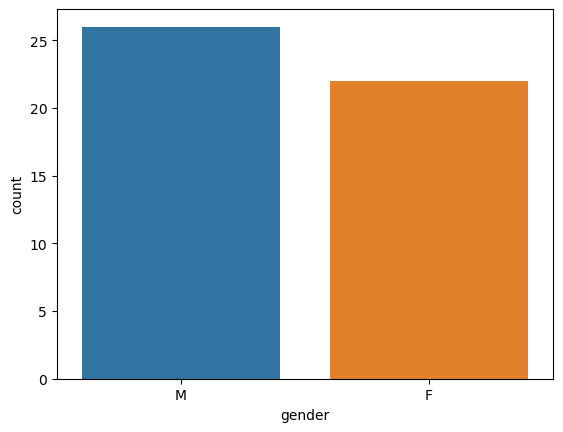

In [34]:
sns.countplot(data=patient_data_frame, x="gender")

c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


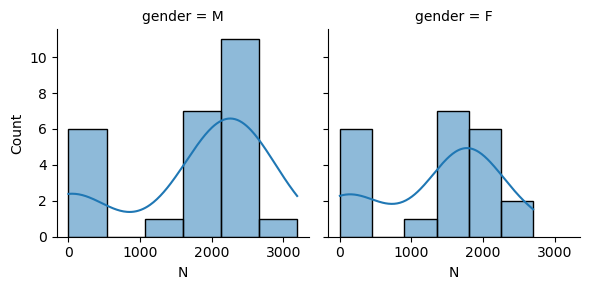

In [43]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.histplot, "N", kde=True)

NameError: name 'true' is not defined

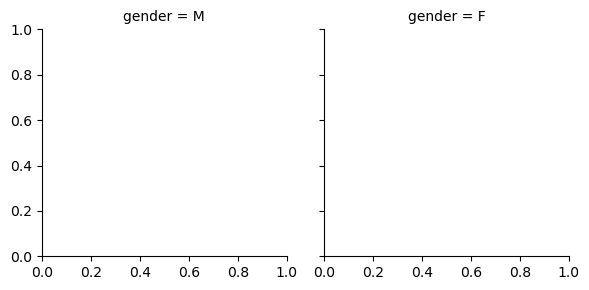

In [44]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.histplot, "/", kde=true)

c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


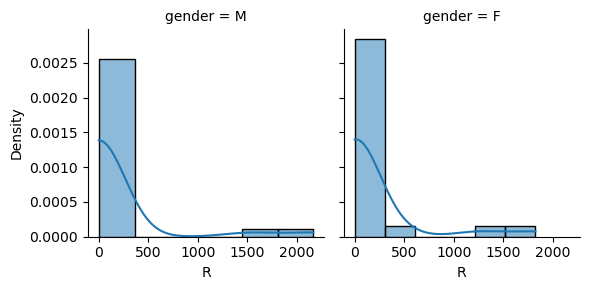

In [46]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.histplot, "R",kde=True,stat="density")

c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


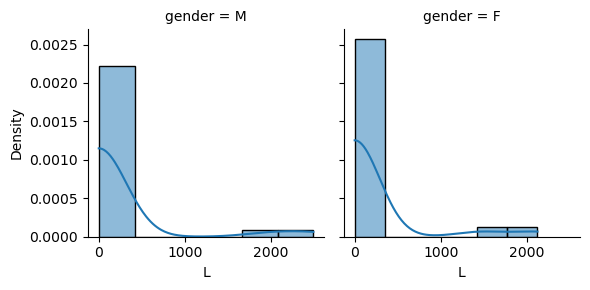

In [39]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.histplot, "L",kde=True, stat="density")

c:\Users\disle\miniconda3\envs\base_ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


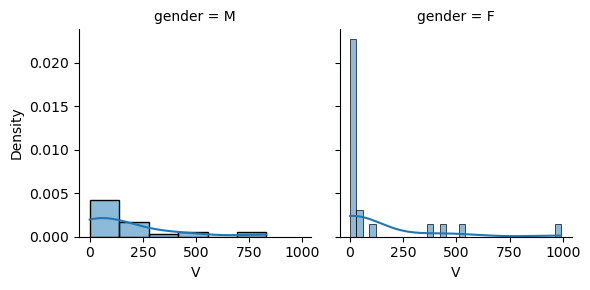

In [47]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.histplot, "V",kde=True, stat="density")

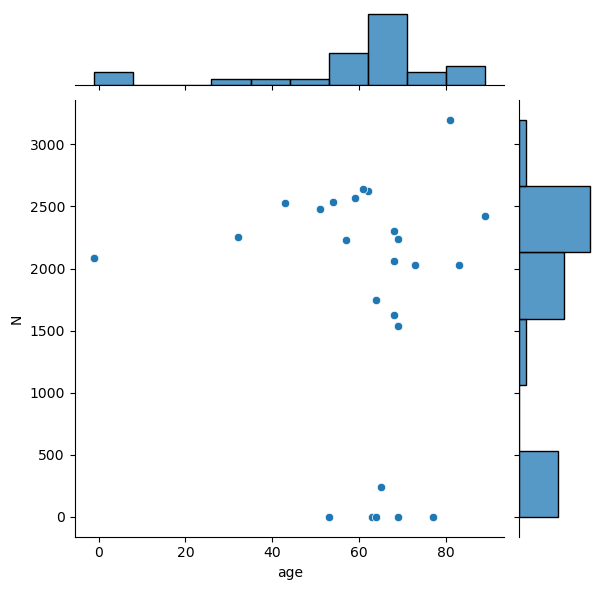

In [48]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="N"
)

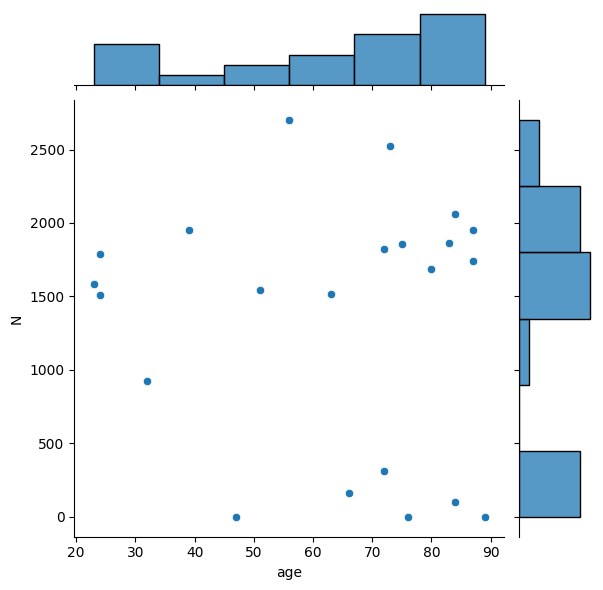

In [32]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="N"
)

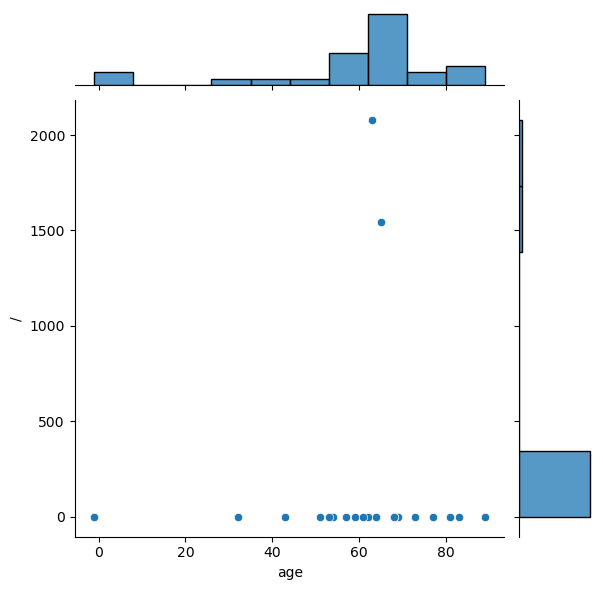

In [49]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="/"
)

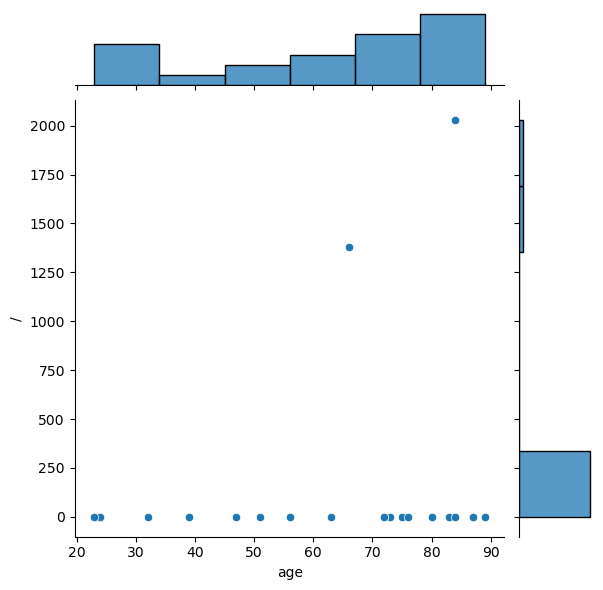

In [50]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="/"
)

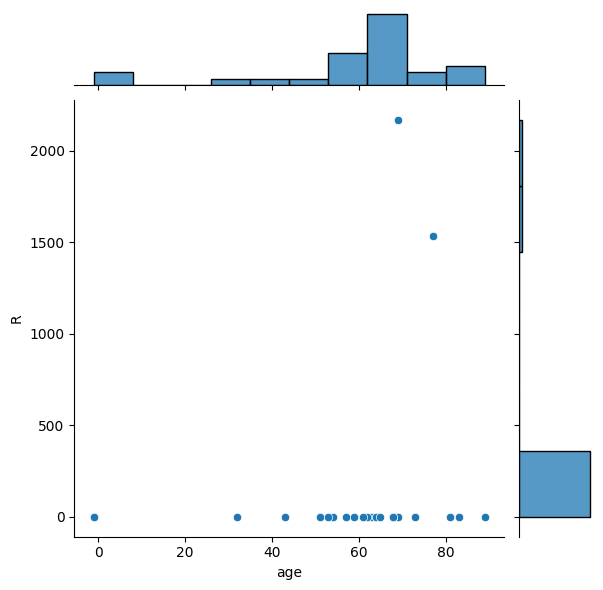

In [35]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="R"
)

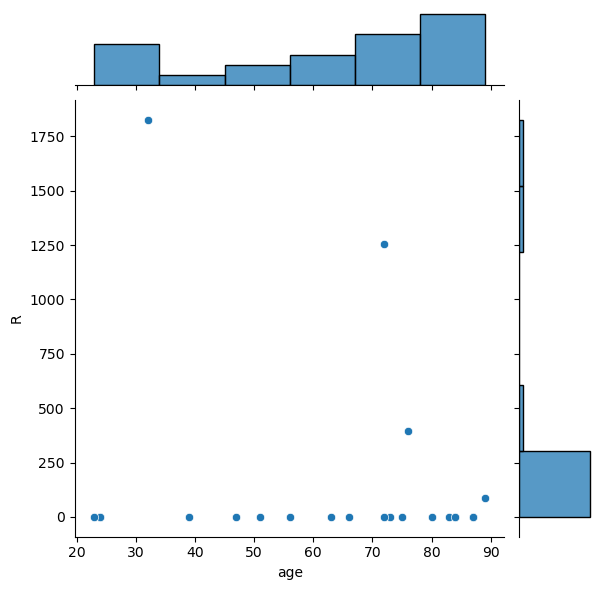

In [51]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="R"
)

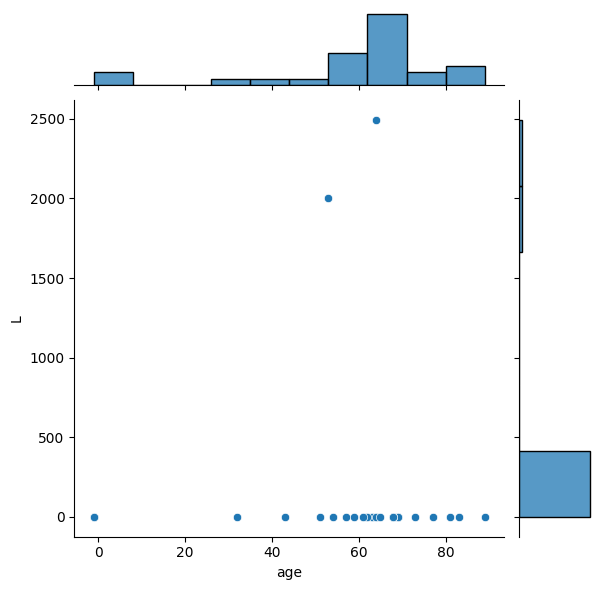

In [37]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="L"
)

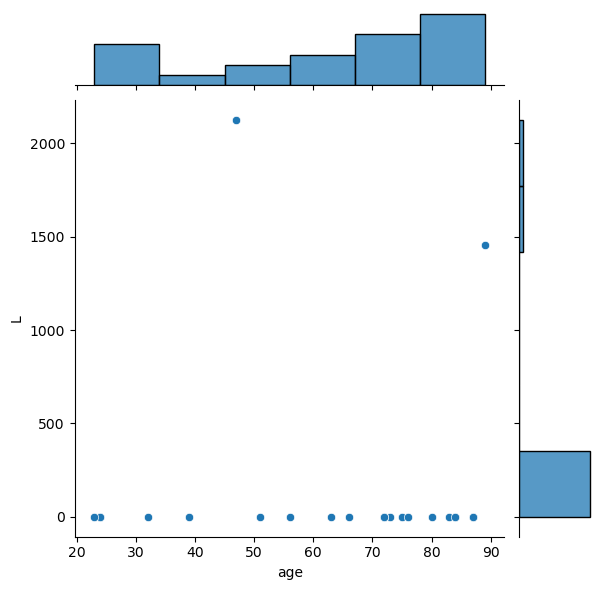

In [52]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="L"
)

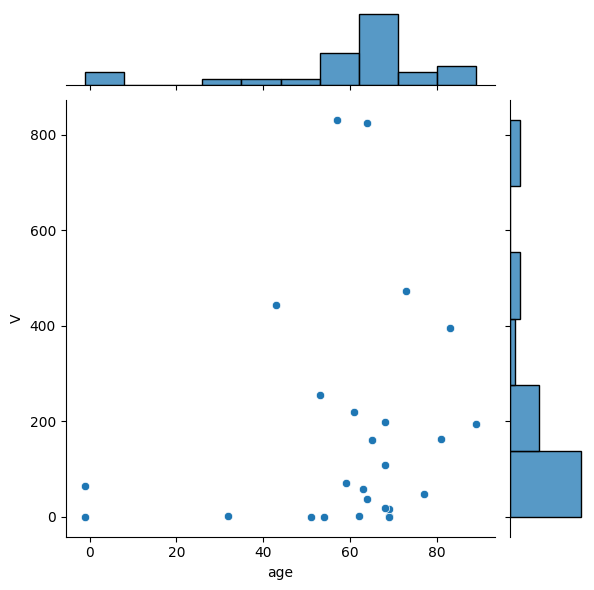

In [39]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="V"
)

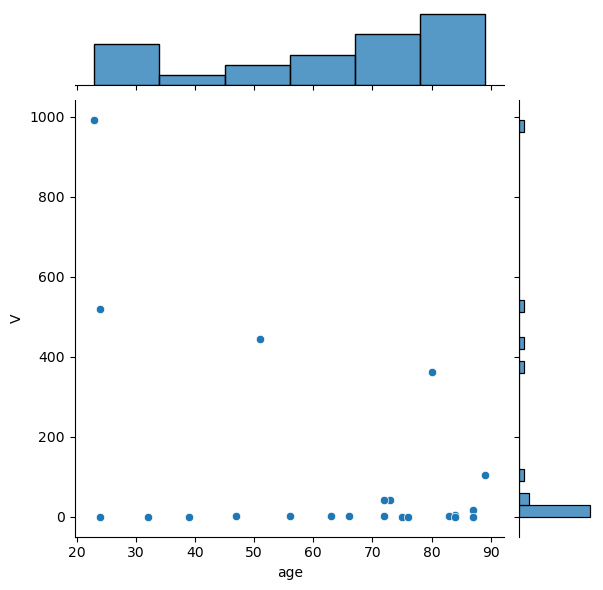

In [53]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="V"
)

In [54]:
def categorize_age(age):
    if age > 0 and age <= 20:
        return "0-20"
    elif age > 20 and age <= 40:
        return "20-40"
    elif age > 40 and age <= 60:
        return "40-60"
    elif age > 60 and age <= 80:
        return "60-80"
    elif age > 80 and age <= 100:
        return "80-100"
    else:
        return "Invalid"


patient_data_frame["age_category"] = patient_data_frame["age"].apply(categorize_age)

In [55]:
patient_data_frame.head()

,!,"""",+,/,A,E,F,J,L,N,...,f,j,x,|,~,age,gender,First lead,Second Lead,age_category
id,,,,,,,,,,,,,,,,,,,,,
100,0,0,1,0,33,0,0,0,0,2239,...,0,0,0,0,0,69,M,MLII,V5,60-80
101,0,0,1,0,3,0,0,0,0,1860,...,0,0,0,4,4,75,F,MLII,V1,60-80
102,0,0,5,2028,0,0,0,0,0,99,...,56,0,0,0,0,84,F,V5,V2,80-100
103,0,0,1,0,2,0,0,0,0,2082,...,0,0,0,0,6,-1,M,MLII,V2,Invalid
104,0,0,45,1380,0,0,0,0,0,163,...,666,0,0,0,37,66,F,V5,V2,60-80


<Axes: xlabel='age_category', ylabel='N'>

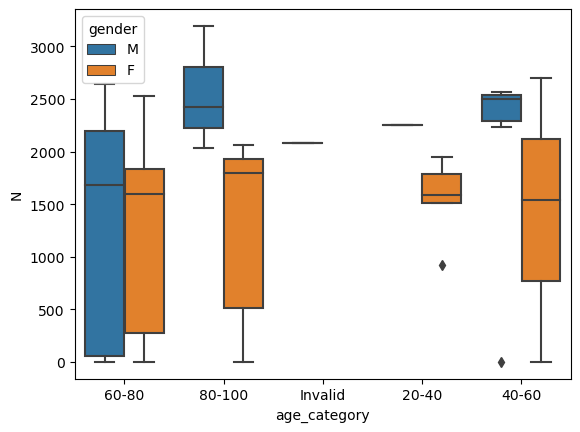

In [56]:
sns.boxplot(data=patient_data_frame, x="age_category", y="N", hue="gender")

<Axes: xlabel='age_category', ylabel='/'>

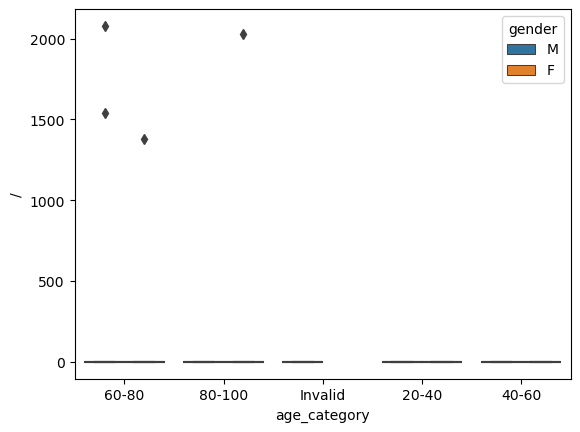

In [57]:
sns.boxplot(data=patient_data_frame, x="age_category", y="/", hue="gender")

<Axes: xlabel='age_category', ylabel='L'>

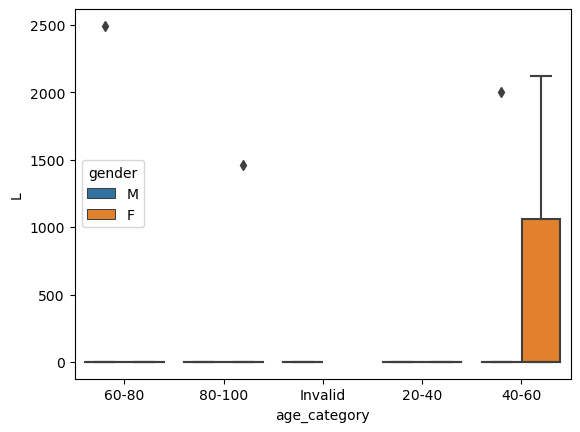

In [58]:
sns.boxplot(data=patient_data_frame, x="age_category", y="L", hue="gender")

<Axes: xlabel='age_category', ylabel='R'>

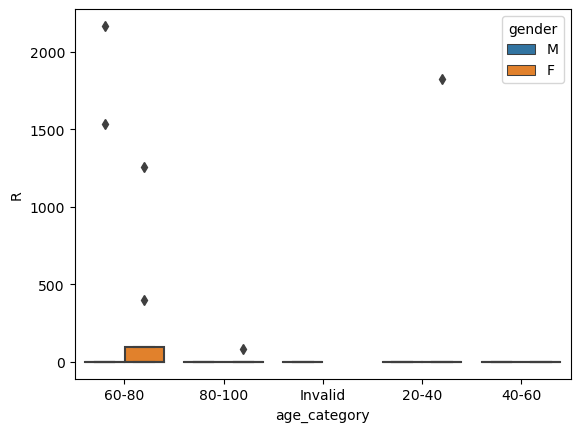

In [59]:
sns.boxplot(data=patient_data_frame, x="age_category", y="R", hue="gender")

<Axes: xlabel='age_category', ylabel='V'>

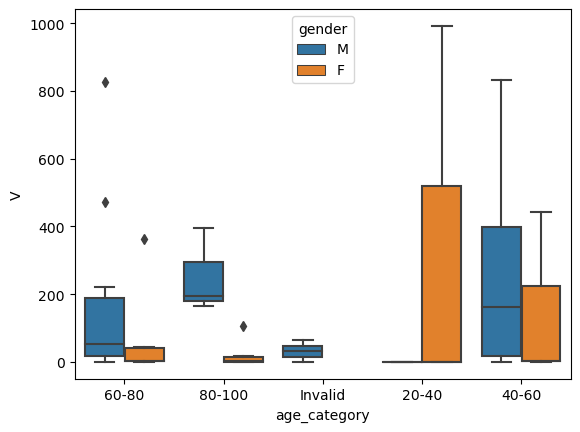

In [60]:
sns.boxplot(data=patient_data_frame, x="age_category", y="V", hue="gender")

<Axes: xlabel='age_category'>

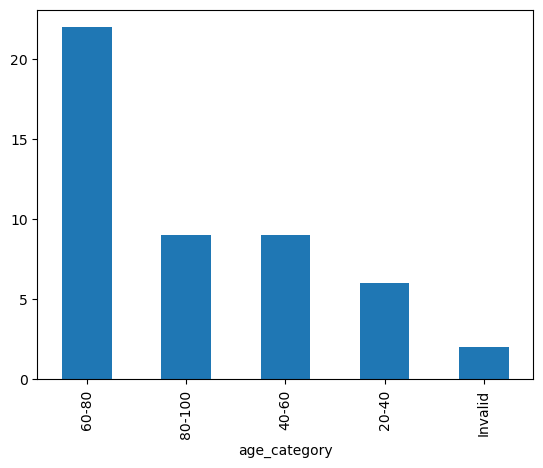

In [61]:
patient_data_frame["age_category"].value_counts().plot(kind="bar")

<Axes: xlabel='First lead'>

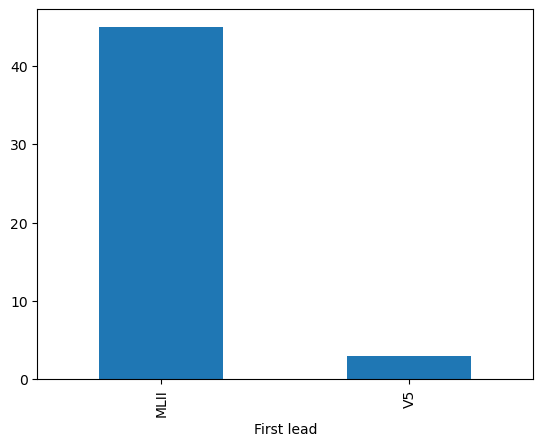

In [62]:
patient_data_frame["First lead"].value_counts().plot(kind="bar")

<Axes: xlabel='Second Lead'>

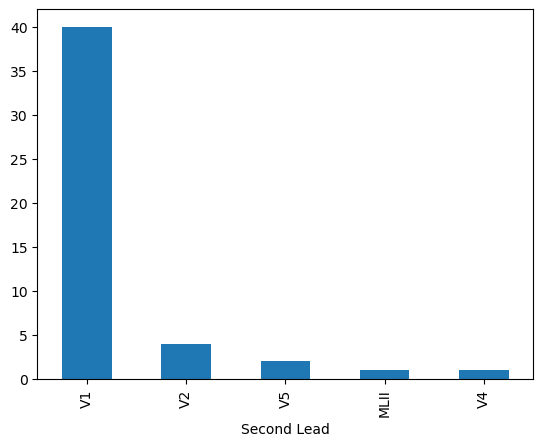

In [63]:
patient_data_frame["Second Lead"].value_counts().plot(kind="bar")

## Data Preprocessing

In [77]:
record101_raw = records[1].ecg_signal()

In [78]:
record101_raw

array([[-0.345, -0.16 ],
       [-0.345, -0.16 ],
       [-0.345, -0.16 ],
       ...,
       [-0.295, -0.11 ],
       [-0.29 , -0.11 ],
       [ 0.   ,  0.   ]])

### Frequencies Present in the Signal

In [66]:
from scipy.fft import rfft, rfftfreq

In [79]:
yf = rfft(record101_raw[:800, 0])
xf = rfftfreq(len(record101_raw[:800, 0]), 1 / 360)

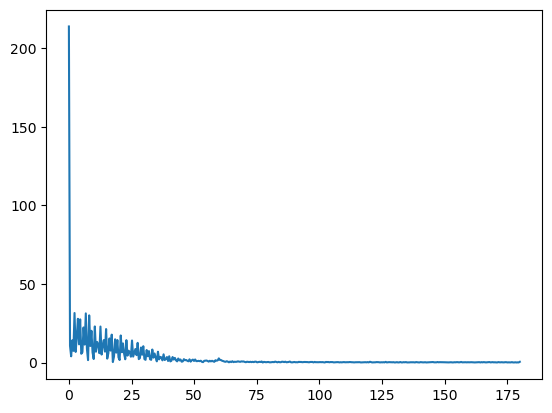

In [80]:
plt.plot(xf, np.abs(yf))

The human ECG spectrum covers the frequency range 0.05 Hz - 100 Hz, with the main part of the QRS complex being in the range 0.5 Hz - 45 Hz. Most of the time the ECG signal is overlaid by the mains frequency of 50 Hz/60 Hz.

### Removing Baseling Wandering

In [81]:
lead_II_signal = record101_raw[:, 0]

In [82]:
lead_II_signal

array([-0.345, -0.345, -0.345, ..., -0.295, -0.29 ,  0.   ])

In [83]:
from utils.common_utils import remove_baseline_wander

new_signal_after_removal_of_baseline_wandering = remove_baseline_wander(lead_II_signal)

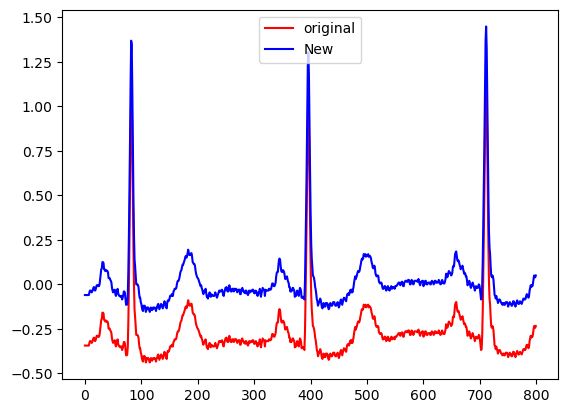

In [84]:
plt.plot(lead_II_signal[:800], color="red")
plt.plot(new_signal_after_removal_of_baseline_wandering[:800], color="blue")
plt.legend(("original", "New"))

### Removing Power Line Interference

In [85]:
from utils.common_utils import remove_powerline_interference

new_signal_after_removal_p_intr = remove_powerline_interference(
    50, new_signal_after_removal_of_baseline_wandering, 360, 2
)

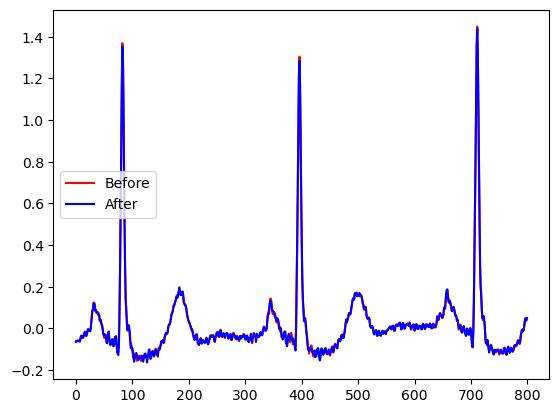

In [86]:
plt.plot(new_signal_after_removal_of_baseline_wandering[:800], color="red")
plt.plot(new_signal_after_removal_p_intr[:800], color="blue")
plt.legend(("Before", "After"))

In [87]:
yf_after = rfft(new_signal_after_removal_p_intr[:800])
xf_after = rfftfreq(len(new_signal_after_removal_p_intr[:800]), 1 / 360)

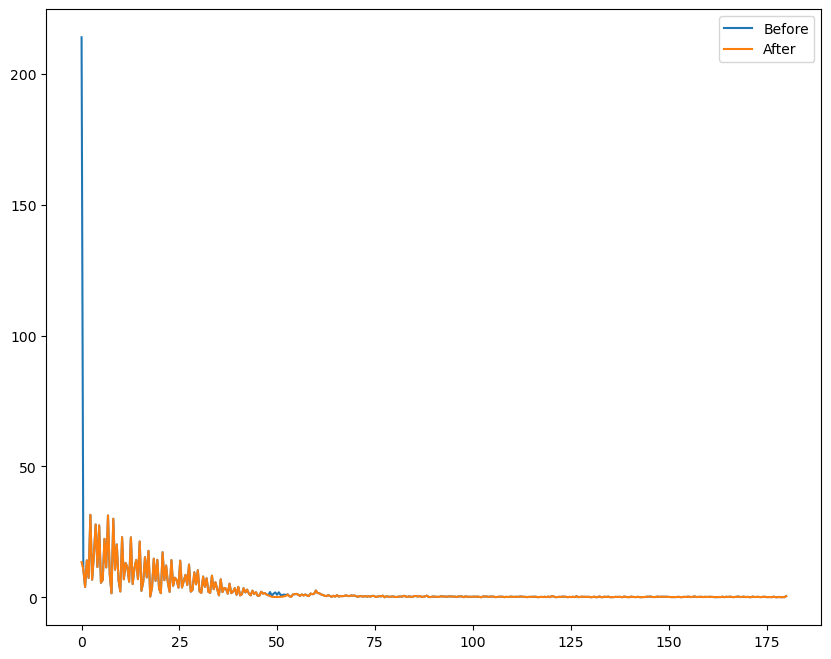

In [88]:
plt.figure(figsize=(10, 8))
plt.plot(xf, np.abs(yf))
plt.plot(xf_after, np.abs(yf_after))
plt.legend(("Before", "After"))

### High Pass Filter at 0.5Hz

In [89]:
from utils.common_utils import high_pass_filter

In [90]:
filteredHighPass = high_pass_filter(new_signal_after_removal_p_intr, 0.5)

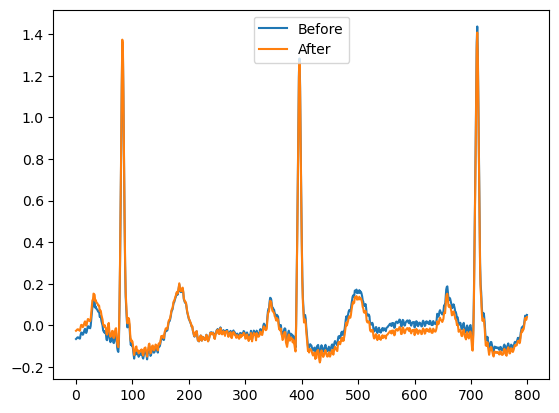

In [91]:
plt.plot(new_signal_after_removal_p_intr[:800])
plt.plot(filteredHighPass[:800])
plt.legend(("Before", "After"))

In [92]:
yf_before = rfft(new_signal_after_removal_p_intr[:800])
xf_before = rfftfreq(len(new_signal_after_removal_p_intr[:800]), 1 / 360)
yf_after = rfft(filteredHighPass[:800])
xf_after = rfftfreq(len(filteredHighPass[:800]), 1 / 360)

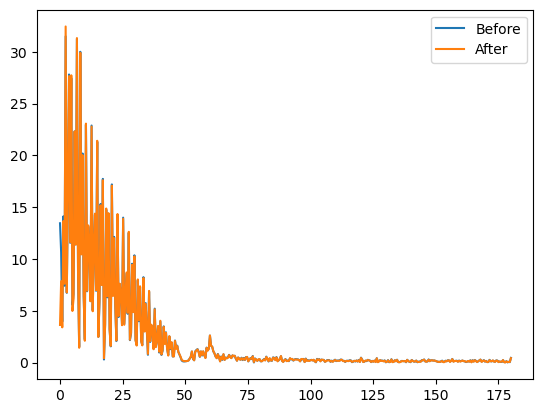

In [93]:
plt.plot(xf_before, np.abs(yf_before))
plt.plot(xf_after, np.abs(yf_after))
plt.legend(("Before", "After"))

### Low Pass Filter with Convolution

In [94]:
from utils.common_utils import hanning_filter

In [95]:
filteredLowPass = hanning_filter(filteredHighPass, 15)

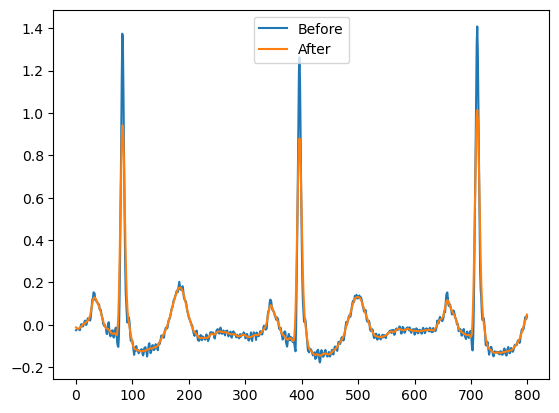

In [96]:
plt.plot(filteredHighPass[:800])
plt.plot(filteredLowPass[:800])
plt.legend(("Before", "After"))

In [97]:
yf_before = rfft(filteredHighPass[:800])
xf_before = rfftfreq(len(filteredHighPass[:800]), 1 / 360)
yf_after = rfft(filteredLowPass[:800])
xf_after = rfftfreq(len(filteredLowPass[:800]), 1 / 360)

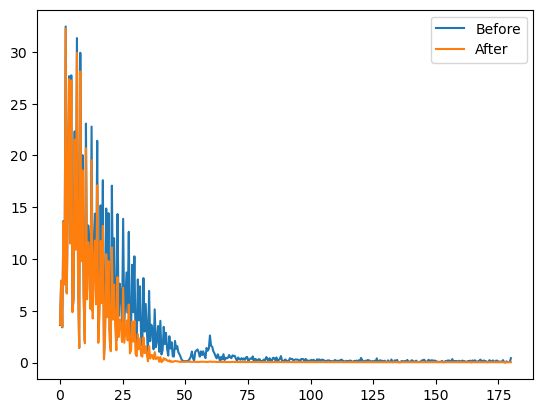

In [98]:
plt.plot(xf_before, np.abs(yf_before))
plt.plot(xf_after, np.abs(yf_after))
plt.legend(("Before", "After"))

### Segmentation

In [116]:
from data_set_utils.data_generator import DataMaker

In [114]:
dm = DataMaker(records, 50, 360, "MLII", 15, 0.5, 2, 100, 100)

In [118]:
ecg_segments = dm.perform_segmentation(symbols_of_interest)

TypeError: DataMaker.segment_signal() missing 4 required positional arguments: 'after_peak', 'signal', 'record_id', and 'sampling_freq'

### Data Frame Preparation

In [100]:
readings = list()
record_ids = list()
segment_starts = list()
segment_ends = list()
annotation_class = list()

In [101]:
for segment in ecg_segments:
    if len(segment.get_readings()) == 200 and any(
        [ann.get_symbol() in symbols_of_interest for ann in segment.get_annotations()]
    ):
        readings.append(segment.get_readings())
        record_ids.append(segment.get_record_id())
        start, stop = segment.get_segment_positions()
        segment_starts.append(start)
        segment_ends.append(stop)
        for i, ann in enumerate(segment.get_annotations()):
            if ann.get_symbol() in symbols_of_interest:
                annotation_class.append(ann.get_symbol())
                break
    else:
        print(f"Skipping {segment.get_record_id()}")
        print(f"Size:{len(segment.get_readings())}")
        print(f"Segment:{segment.get_segment_positions()}")
        print(f" Annotations:{[ann.get_symbol() for ann in segment.get_annotations()]}")
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++")

NameError: name 'ecg_segments' is not defined

In [79]:
readings = np.array(readings)

In [80]:
readings.shape

(99174, 200)

In [81]:
ecg_data = pd.DataFrame(readings, columns=range(0, 200))

In [82]:
ecg_data["Record ID"] = np.array(record_ids)
ecg_data["Segment Start"] = np.array(segment_starts)
ecg_data["Segment End"] = np.array(segment_ends)
ecg_data["Annotation Class"] = np.array(annotation_class)

In [83]:
ecg_data.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,Record ID,Segment Start,Segment End,Annotation Class
0,0.059449,0.055308,0.052035,0.049666,0.047961,0.046922,0.046801,0.047770,0.049465,0.051072,...,0.033981,0.034276,0.034166,0.033702,0.033134,0.032648,100,13,213,N
1,0.084239,0.087566,0.088956,0.088621,0.086919,0.084459,0.081823,0.079506,0.077958,0.077429,...,0.020272,0.020719,0.020971,0.020866,0.020622,0.020434,100,307,507,N
2,-0.006937,-0.005690,-0.005184,-0.005172,-0.005405,-0.005802,-0.006385,-0.007163,-0.008008,-0.008625,...,-0.084841,-0.084325,-0.082953,-0.080644,-0.077424,-0.073181,100,563,763,N
3,0.072086,0.073128,0.073026,0.071802,0.069731,0.067336,0.065156,0.063624,0.062977,0.063282,...,0.040177,0.039328,0.038051,0.036671,0.035565,0.034817,100,883,1083,N
4,0.084762,0.083995,0.082327,0.080127,0.077701,0.075216,0.072963,0.071264,0.070261,0.069845,...,0.027249,0.029211,0.031715,0.034364,0.036462,0.037443,100,1168,1368,N


In [84]:
for i, column_to_move in enumerate(["Record ID", "Segment Start", "Segment End"]):
    column = ecg_data.pop(column_to_move)
    ecg_data.insert(i, column_to_move, column)

In [85]:
ecg_data.head()

,Record ID,Segment Start,Segment End,0,1,2,3,4,5,6,...,191,192,193,194,195,196,197,198,199,Annotation Class
0,100,13,213,0.059449,0.055308,0.052035,0.049666,0.047961,0.046922,0.046801,...,0.029812,0.031902,0.033233,0.033981,0.034276,0.034166,0.033702,0.033134,0.032648,N
1,100,307,507,0.084239,0.087566,0.088956,0.088621,0.086919,0.084459,0.081823,...,0.020380,0.020170,0.020049,0.020272,0.020719,0.020971,0.020866,0.020622,0.020434,N
2,100,563,763,-0.006937,-0.005690,-0.005184,-0.005172,-0.005405,-0.005802,-0.006385,...,-0.083923,-0.084476,-0.084798,-0.084841,-0.084325,-0.082953,-0.080644,-0.077424,-0.073181,N
3,100,883,1083,0.072086,0.073128,0.073026,0.071802,0.069731,0.067336,0.065156,...,0.040917,0.040820,0.040605,0.040177,0.039328,0.038051,0.036671,0.035565,0.034817,N
4,100,1168,1368,0.084762,0.083995,0.082327,0.080127,0.077701,0.075216,0.072963,...,0.024691,0.025225,0.025977,0.027249,0.029211,0.031715,0.034364,0.036462,0.037443,N


In [86]:
ecg_data["Annotation Class"].value_counts()

Annotation Class
N    73439
L     8068
R     7255
V     6793
/     3619
Name: count, dtype: int64

<Axes: xlabel='Annotation Class'>

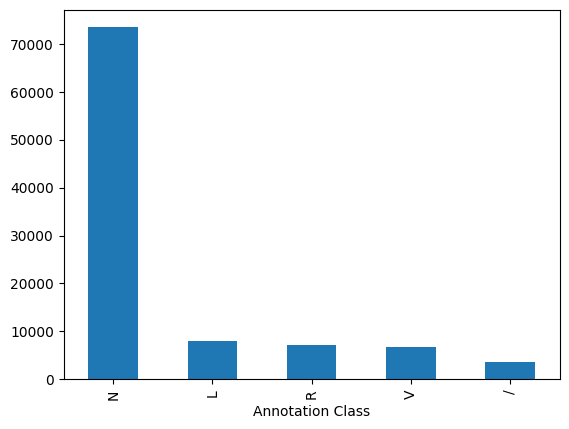

In [87]:
ecg_data["Annotation Class"].value_counts().plot(kind="bar")

In [88]:
ecg_data.to_csv("processed_data/ecg_processed_data.csv")

In [89]:
df.to_csv("processed_data/annotation_count.csv")

In [90]:
patient_data_frame.to_csv("processed_data/patient_summary_info.csv")